In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

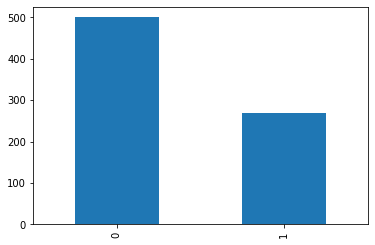

In [6]:
data['Outcome'].value_counts().plot(kind='bar')

In [7]:
predictors=data.iloc[:,0:8]
response=data.iloc[:,8]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(predictors,response,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [9]:
kerasmodel=Sequential()
kerasmodel.add(Dense(12,input_dim=8,activation='relu'))
kerasmodel.add(Dense(8,activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid')) 



kerasmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [10]:
kerasmodel.fit(x=X_train,y=y_train,epochs=150,batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 4.4392 - accuracy: 0.3844
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 1.5176 - accuracy: 0.4658
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 1.0328 - accuracy: 0.5717
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.9045 - accuracy: 0.6221
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8908 - accuracy: 0.5993
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8367 - accuracy: 0.6287
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7939 - accuracy: 0.6189
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.6238
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7554 - accuracy: 0.6270
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7349 - accuracy: 0.6221
Epoch 11/

In [16]:
_,accuracy=kerasmodel.evaluate(X_train,y_train)
print('Train Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.7687
Train Accuracy: 76.87


In [23]:
from sklearn.metrics import accuracy_score
y_pred=kerasmodel.predict(X_test)
y_pred = [1 if x >  0.5 else 0 for x in y_pred]

print(accuracy_score(y_pred,y_test))

5/5 [==============================] - 0s 2ms/step
0.7402597402597403
